# Case study: ABS

As you have learned, Python is an **Object Orientated Progamming (OOP) language**.  We can follow the standard paradigm of OOP in python by creating **classes** and then instantiating an instance of the class called an **object**.  A class offers a higher level of abstraction for your code than functions alone.  One of the key benefits for data science is that you can design your algorithms to be resuable and composed from multiple classes. 

**In this section you will learn:**
* How to do define a class in Python
* Apply basic object orientated techniques to build an agent based simulation.

> To help visualise our problem we are going to use a package called **MatPlotLib**.  We will cover this in detail later, but for now you just need to know that it allows us to create charts from our data.  The code is provided.
---

## Coding Problem: 'Oh data scientists - can't you all just get along!'

To apply the basics of OOP you will create an **Agent Based Simulation** (ABS).  ABS is a popular methodology in data science for modelling emergent behaviour when a group of simple **agents** interact with each other within an **environment**.  Agents can be thought of an object with state and behaviour.  That lends itself nicely to the concept of a class from OOP. The concept of emergence is important in ABS as we are not coding the outcome of the modelling.  We are instead coding some behavioural interaction rules between the agents and exploring what happens when we run the model and set the agents loose.

> A full treatment ABS is out of scope for this course, but it is used a lot in health data science. You may have seen a number of ABS models used to model the epidemiology of COVID-19.

**Here's a description of our problem:**

* Data scientists live in a 2 dimensional gridword. That is a (n X m) grid of cells.  Each cell can only be inhabited by a single data scientist.
* In grid world data scientists either favour Python or R. 
* A Data Scientist has a similarity threshold where they desire a % of their neighbours to code in their favourite language too!  
* If the agents neighbours are not similar enough the data scientist becomes unhappy and moves to a random empty location in the world!
* The simulation will run for a maximum number of iterations.  If all agents are happy in any iteration then the simulation terminates early.
* Agents make decisions about moving based on the state of the environment in the current iteration.  That is they have no knowledge if other data scientists are happy or unhappy.

> This problem is actually a classic ABS modelling study by Schelling that studied the dynamics of segregation in populations.

## Designing your code

Before you write any code take a momemt to think about what the basic class structure of your code might look like.

### Agents

The most obvious class we could include represents an **Agent**.  In some applications, you may want multiple types of agent class, but here their general behaviour is the same i.e. they become unhappy when they are not surrounded by enough of their fellow coding peers.  So here we you can simply define a single agent class and give it the attribute `language` of type `str` that determines the agents preference for Python or R.

Remember that in the simulation we will be creating multiple objects of type `DataScientist`.  This is your **population**.  The skeleton code for `DataScientist`.  

> Reminder: we have overloaded the `__init__()` method when creating an instance of `DataScientist`.  This is used to **parameterise** the agent.  Here we pass in a unique id, the coordinates in gridworld, the prefered coding language, the environment and the similarity threshold.

The method `is_unsatisified_with_neighbours` returns `True` when an agent is unhappy with similarity of its neighbours in a grid.

In [1]:
class DataScientist:
    def __init__(self, unqiue_id, row, col, language, env, threshold):
        pass
    
    def is_unsatisified_with_neighbours(self):
        pass

### Environment 

After agents the decision making about what classes to include becomes a bit more fuzzy.  You could code the whole simulation to work with a single agent class and complete the rest using functions.  However, an environment object is a useful level of abstraction when creating a framework for running your model.  The code will also be much more readable.  Another benefit is that in a more complicated problem you might need to include multiple environments type classes (e.g. interacting wards or even whole hospitals containing agents).

Here you will define a class called `GridWorld` that contains a population of `DataScientist` objects.  We will take a look how these agents are stored internally shortly.



In [2]:
class GridWorld:
    def __init__(self, n_rows, n_cols, n_empty, random_seed=None):
        pass
    
    def get_neighbours(self, row, col):
        pass
    
    def relocate(self, agent):
        pass

### The main loop

The simulation consists of a main loop that either runs for a maximum number of iterations or terminates early if all agents are happy.  Again you could just implement this as a function.  However, you may want to explore multiple **scenarios** with the model.  A scenario for example might explore a different similarity thresholds or ration of 'Python' coders to 'R' coders (for example what happens in a world where all all coders use Python and none use R!?).  For this reason you will create a simple `Model` class.  This will include a `run()` method that will start the main loop and the simulation. 


In [3]:
class Model:
    def __init__(self, environment, max_iter):
        pass
    
    def run(self):
        pass

## Coding the ABS using OOP techniques

### Imports

You will mostly be using standard python in this example, but you will also make use of the following libraries:

* `itertools`: we will use the `product` function to help use quickly generate a large number of coordinate pairs.
* `random`: the movement of agents in gridworld is stochastic.  We use the the `choice` function to select a random location for movement of unhappy agents.
* `time`: for fun we will time our code to see how long it take to execute a model (using the imaginitiviely titled `time.time()` function.)
* `matplolib.pyplot`: used to plot a gridworld.  We will use circles of different colours to represent agents.

In [4]:
import itertools
import random
import time
import matplotlib.pyplot as plt

### Constants and default parameter values

In [5]:
# grid defaults
N_ROWS = 32
N_COLS = 32
N_CELLS = N_ROWS * N_COLS

# coder language constants
LANG_PYTHON = 'PYTHON'
LANG_R = 'R'

# default simulation parameters
RATIO_R_TO_PYTHON = 0.5
PERCENT_EMPTY = 0.2
SIMILARITY_THRESHOLD = 0.3
MAX_ITER = 500

## The `DataScientist` class

When creating a new `DataScientist` we will use the following syntax

```python
# create an new data scientist agent that prefers python
agent = DataScientist(unique_id=1, row=0, col=0, language=LANG_PYTHON, 
                      env=grid_env, threshold=SIMILARITY_THRESHOLD)
```

> In the above code snippet `grid_env` is an instance of the `GridWorld` class where an agent lives and interacts with other agents.

As you have already learned `agent` is an **instance** of the class `DataScientist`.  At this stage all the code has done is parameterise the agent and position it in the grid environment.  The code below demonstrates how you would store these parameters as class attributes using `self`.  

```python
class DataScientist:
    def __init__(self, unqiue_id, row, col, language, env,
                 threshold=SIMILARITY_THRESHOLD):
        # store the class attributes
        self.unique_id = unique_id
        self.row = row
        self.col = col
        self.language = language
        self.env = env
        self.threshold = threshold
        
        
    def is_unsatisified_with_neighbours(self):
        pass
```

The only public method that `DataScientist` makes available is `is_unsatisified_with_neighbours()`.  For the agent to makes its decision it must first gather its neighbours.  This can be done by calling `GridWorld.get_neighbours(row, col)`.  A `DataScientist` agent contains the attribute `self.env` which is a reference to the grid world.  You can therefore access the agent's neighbours like so:

```python
neighbours = self.env.get_neighbours(self.row, self.col)
```

We haven't implemented the `GridWorld` class yet, but for now you can note that `get_neighbours` returns a `list` of `DataScientist` objects that live in the neighbouring cells to the agent. Note this list is of variable length and depending on the number of empty cells next to an agent. From here it is straightforward to calculate the percentage of neighbours that use the same coding language.  As an example code could:

* Calculate the number of neighbours by taking the `len` of the returned list.
* Calculate the number of similar neighbours using a loop or list comprehension.
* Check for the special case where the number of neighbours is zero and return False.
* Calculate the proportion of similar neighbours and check if this is less than the agent's similarity threshold.

An example implementation of the method `is_unsatisified_with_neighbours` is given in the code listing below.

In [6]:
class DataScientist:
    def __init__(self, unqiue_id, row, col, language, env,
                 threshold=SIMILARITY_THRESHOLD):
        self.unique_id = unique_id
        self.row = row
        self.col = col
        self.language = language
        self.env = env
        self.threshold = threshold
        
        
    def is_unsatisified_with_neighbours(self):
        neighbours = self.env.get_neighbours(self.row, self.col)
        n_similar = len([n for n in neighbours if n.language == self.language])

        if len(neighbours) == 0:
            return False
        else:
            return (float(n_similar) / float(len(neighbours))) < self.threshold

To improve the usability of our class let's add a class **property** `coordinates` that provides a simple interface to get and set the `row` and `col` attributes.

There are different ways to implement properties in python.  We have already come across the decorator `@property`.  We will use that in a slightly more explicit way here.  First we will create two private methods (names prefixed by `_`) for getting and setting repectively. Take a look at how these method are implemented and note that `_set_coordinates` includes some validation of the input (a useful feature!).

```python
    def _get_coordinates(self):
        return (self.row, self.col)

    def _set_coordinates(self, coords):
        if type(coords) is tuple and len(coords) == 2:
            self.row, self.col = coords[0], coords[1]
        else:
            raise ValueError('Coordinartes should be (int, int)')
```

To create a simple interface for coorinates we then pass both methods to the property decorator `coordinates`.  

```python
coordinates = property(_get_coordinates, _set_coordinates)
```

The full code listing for `DataScientist` is provided below.  Make sure you note the indentation levels of the methods and `coordinates`.  I've also included some PEP8 style docstrings with the code.  This is good practice and although sometimes a pain it is an effient way to document your code within the python ecosystem.

In [7]:
class DataScientist:
    '''
    Encapsulates a coder agents attributes and behaviour
    '''
    def __init__(self, id, row, col, language, env,
                 threshold=SIMILARITY_THRESHOLD):
        '''
        DataScientist

        Params:
        ------
        id: int
            unique id
        row: int
            row in gridworld
        col: int
            col in gridworld
        language: str
            preference for python or R
        env: GridWorld
            environment in which the Data Scientist lives and
            interacts with other agents
        threshold: float
            similarity threshold for immediate neighbourhood.
        '''
        self.id = id
        self.row = row
        self.col = col
        self.language = language
        self.env = env
        self.threshold = threshold

    def _get_coordinates(self):
        '''
        Get the coordinates of the agent in gridworld

        Returns:
        -------
        tuple (row, col)
        '''
        return (self.row, self.col)

    def _set_coordinates(self, coords):
        '''
        Set coordinates of the agent in gridworld

        Params:
        ------
        coords: (int, int)
        '''
        if type(coords) is tuple and len(coords) == 2:
            self.row, self.col = coords[0], coords[1]
        else:
            raise ValueError('Coordinartes should be (int, int)')

    def is_unsatified_with_neighbours(self):
        '''
        Does the data scientists neighbourhood violate
        its similarity constraint?
        I.e. is the number of neighbours below similarity threshold.

        Returns:
        -------
        bool
        '''
        neighbours = self.env.get_neighbours(self.row, self.col)
        n_similar = len([n for n in neighbours if n.language == self.language])

        if len(neighbours) == 0:
            return False
        else:
            return (float(n_similar) / float(len(neighbours))) < self.threshold

    coordinates = property(_get_coordinates, _set_coordinates)

## The `GridWorld` class

To create a new instance of `GridWorld` the following interface applies:

```python
env = GridWorld(n_rows=N_ROWS, n_cols=N_COLS,
                n_empty=int(PERCENT_EMPTY * N_CELLS),
                random_seed=42)
```

I.e. we specify the number of rows and columns, the number of cells that are empty at any one time and optionally a random seed to allow for a repeatable run of the stochastic model.

### Initialising `GridWorld`

The parameters we pass to `GridWorld` are processed in its `__init__` constructor method.  We need to:

* Create a total of `N_CELL - n_empty` agents with the correct ratio of python to R preferences.
* Place these agents in random coordinates in the grid.

To do this we will create three simple data structures.  

1. a list of lists `self.grid` that is our 2D representation.  This allows us to efficiently return the neighbours of a `DataScientist` simply by specifying row and column indicies.
2. a list `self.agents` so that we can efficiently loop through all agents without worry about empty cells.
3. a list `self.empty` that keeps track of empty cells and allows us to efficiently select one at random.

To create a list of lists we could use a `for` loop, but because it is slightly faster and also simple to read here we will use a list comprehension.  

```python
self.grid = [[None for i in range(n_cols)] for j in range(n_rows)]
```

We then need to randomly add a total of `N_CELL - n_empty` agents to this grid.  The way we do this efficiently might seem a bit odd at first.  Essentially we generate a list of all ordered coordinate pairs.  We then shuffle this list and take the first `N_CELL - n_empty` items.  This gives us our random locations for agents.

Let's tackle generating the coordiate pairs first.  The library `itertools` provides a function called `product`.  We pass in a enumeration of the rows and columns and it returns a **generator** object that we can use to create all coordinate pairs. By enumeration I mean a construct like `range(10)`.  From your for-loop experience you know that this enumerates all numbers 0 to 9.   The code looks like the below (you might want to try running this independent of any class implementation to see what it returns).

In [8]:
n_rows, n_cols = 2, 2
coords = list(itertools.product(range(n_rows), range(n_cols)))
coords

[(0, 0), (0, 1), (1, 0), (1, 1)]

Randomising this array is as simple as calling the `random.shuffle` function (note this operation is doine inplace)

```python
random.shuffle(coords)
```

It is now trivial to create our agents and randomly allocate them to cells in our gridworld.

```python
        # create agents in correct proportion of R to Python.
        self.n_agents = N_CELLS - n_empty
        self.agents = []
        for i in range(self.n_agents):
            if i < int(self.n_agents * RATIO_R_TO_PYTHON):
                lang = LANG_R
            else:
                lang = LANG_PYTHON

            # create agent and store in list of agents and grid
            # remember that coords has been shuffled (randomised) beforehand
            agent = DataScientist(unique_id=i, row=coords[i][0], col=coords[i][1],
                                  language=lang, env=self)
            
            # place agent in grid
            self.grid[agent.row][agent.col] = agent
            # also track agents in a seperate list for efficient iteration.
            self.agents.append(agent)
```

Our final data struture tracks empty cells in grid world (empty cells are presented by `None`).  We simple use the remaining coordinate pairs i.e. `coords[n_agents:]` as our random empty cells.  Note that `self.empty_cells` is therefore a list of tuples (row, col) coordinates.

```python
self.empty_cells = [coord for coord in coords[self.n_agents:]]
```

The updated code listing is below.

In [9]:
class GridWorld:
    def __init__(self, n_rows, n_cols, n_empty, random_seed=None):
        # Number of agents to create
        self.n_agents = N_CELLS - n_empty
        # 1. grid world represented as list of lists - all cells empty on init
        self.grid = [[None for i in range(n_cols)] for j in range(n_rows)]
        # 2d grid coordinates
        coords = list(itertools.product(range(n_rows), range(n_cols)))
        # shuffle coordinates to use to place agents
        random.seed(random_seed)
        random.shuffle(coords)

        # create agents in correct proportion of R to Python.
        self.agents = []
        for i in range(self.n_agents):
            if i < int(self.n_agents * RATIO_R_TO_PYTHON):
                lang = LANG_R
            else:
                lang = LANG_PYTHON

            # create agent and store in list of agents and grid
            # remember that coords has been shuffled (randomised) beforehand
            agent = DataScientist(id=i, row=coords[i][0], col=coords[i][1],
                                  language=lang, env=self)
            self.grid[agent.row][agent.col] = agent
            # its useful to have a seperate list of agents
            self.agents.append(agent)

        # the empty cells in the gridworld
        self.empty_cells = [coord for coord in coords[self.n_agents:]]
    
    def get_neighbours(self, row, col):
        pass
    
    def relocate(self, agent):
        pass

### `GridWorld.get_neighbours(self, row, col)` method

Remember that an agents neighbours are the surrounding cells that contain other agents.  This can be a minimum of 0 and maximum of 8 agents. 

The get neighbours method is actually quite simple.  There are - as always - several ways you might implement it.  Here we will aim to construct reasonably efficient code that is also readable.  

We will take the following approach:

1. Create a tuple called `coords` that contains the 8 possible coordinates of neighbours.  For agents living at the borders of gridworld this will include infeasible coordinates.  (e.g. row < 0).
2. We will iterate of `coords` and append agents from all feasible coordiate pairs to a list called `feasible`. Empty cells will be ignored.


Creating our candidate coordinate array is simple. As its only 8 locations I'll hardcode it for readability.

```python
# coordinates of neighbours (some may be infeasible)
coords = ((row - 1, col - 1),
          (row - 1, col),
          (row - 1, col + 1),
          (row, col - 1),
          (row, col + 1),
          (row + 1, col - 1),
          (row + 1, col),
          (row + 1, col + 1))
```

We'll then use a list comprehension to create the `feasible` list of neighbours.  We can check the row and col are between 0 and their limits on each iteration and also check that the coordinates are not in `self.empty`.  This latter check makes sure we don't accidently include 'None' in our list of neighbours. 

```python
# convert feasible non empty coordinates into list of agents
feasible = [self.grid[c[0]][c[1]] for c in coords
            if c[0] >= 0 and c[1] >= 0
            and c[0] < N_ROWS and c[1] < N_COLS
            and c not in self.empty_cells]
```

The updated code listing for `GridWorld` is below:

In [10]:
class GridWorld:
    def __init__(self, n_rows, n_cols, n_empty, random_seed=None):
        # Number of agents to create
        self.n_agents = N_CELLS - n_empty
        # 1. grid world represented as list of lists - all cells empty on init
        self.grid = [[None for i in range(n_cols)] for j in range(n_rows)]
        # 2d grid coordinates
        coords = list(itertools.product(range(n_rows), range(n_cols)))
        # shuffle coordinates to use to place agents
        random.seed(random_seed)
        random.shuffle(coords)

        # create agents in correct proportion of R to Python.
        self.agents = []
        for i in range(self.n_agents):
            if i < int(self.n_agents * RATIO_R_TO_PYTHON):
                lang = LANG_R
            else:
                lang = LANG_PYTHON

            # create agent and store in list of agents and grid
            # remember that coords has been shuffled (randomised) beforehand
            agent = DataScientist(id=i, row=coords[i][0], col=coords[i][1],
                                  language=lang, env=self)
            self.grid[agent.row][agent.col] = agent
            # its useful to have a seperate list of agents
            self.agents.append(agent)

        # the empty cells in the gridworld
        self.empty_cells = [coord for coord in coords[self.n_agents:]]
    
    def get_neighbours(self, row, col):
        # coordinates of neighbours (some may be infeasible)
        coords = ((row - 1, col - 1),
                  (row - 1, col),
                  (row - 1, col + 1),
                  (row, col - 1),
                  (row, col + 1),
                  (row + 1, col - 1),
                  (row + 1, col),
                  (row + 1, col + 1))

        # convert feasible non empty coordinates into list of agents
        feasible = [self.grid[c[0]][c[1]] for c in coords
                    if c[0] >= 0 and c[1] >= 0
                    and c[0] < N_ROWS and c[1] < N_COLS
                    and c not in self.empty_cells]

        return feasible
    
    def relocate(self, agent):
        pass

### `GridWorld.relocate(self, agent)` method

Almost there!  The final method to implement swaps the position of an agent with an empty cell.

First we need to select a random empty location in the grid. Let's create its own method (this is for readability - its actually only 1 line of code).

```python    
    def get_random_empty_cell(self):
        '''
        Return a random empty cell
        '''
        return random.choice(self.empty_cells)
```

We can now perform the swap and update our data structures that track the state of gridworld.

```python
        new_loc = self.get_random_empty_cell()
        old_loc = agent.coordinates

        # swap locations in grid and update agents coordinates.
        self.grid[new_loc[0]][new_loc[1]] = agent
        self.grid[old_loc[0]][old_loc[1]] = None
        agent.coordinates = (new_loc[0], new_loc[1])

        # swap empty and full coords in lookup
        self.empty_cells.remove(new_loc)
        self.empty_cells.append(old_loc)
```

Excellent.  The final code listing for `GridWorld` is below.  Again I've added PEP8 docstrings.

In [11]:
class GridWorld:
    '''
    Encapsulates a gridworld environment for coders to live in.
    '''
    def __init__(self, n_rows, n_cols, n_empty, random_seed=None):
        '''
        GridWorld - a 2D grid environment containing data scientists
        who code in either Python or R and are intolerant to each
        other!

        Params:
        ------
        n_rows: int
            Number of rows in the grid

        n_cols: int
            Number of cols in the grid

        n_empty: int
            Number of cells in the grid that remain empty
            at any one time

        random_seed: int, optional (default=None)
            Control the randomisation for a repeatable
            run of the simulation.

        '''
        # initial grid is all empty -
        self.n_agents = N_CELLS - n_empty
        # grid world represented as list of lists - all cells empty on init
        self.grid = [[None for i in range(n_cols)] for j in range(n_rows)]
        # 2d grid coordinates
        coords = list(itertools.product(range(n_rows), range(n_cols)))
        # shuffle coordinates to use to place agents
        random.seed(random_seed)
        random.shuffle(coords)

        # create agents
        self.agents = []
        for i in range(self.n_agents):
            if i < int(self.n_agents * RATIO_R_TO_PYTHON):
                lang = LANG_R
            else:
                lang = LANG_PYTHON

            # create agent and store in list of agents and grid
            # remember that coords has been shuffled (randomised) beforehand
            agent = DataScientist(id=i, row=coords[i][0], col=coords[i][1],
                                  language=lang, env=self)
            self.grid[agent.row][agent.col] = agent
            # its useful to have a seperate list of agents
            self.agents.append(agent)

        # the empty cells in the gridworld
        self.empty_cells = [coord for coord in coords[self.n_agents:]]

        print(f'empty cells: {len(self.empty_cells)}, expected: {n_empty}')
        print(f'agents: {len(self.agents)}')
        print(f'grid size: {N_CELLS}')

    def get_neighbours(self, row, col):
        '''
        Return the feasible neighbours for row and col

        Params:
        -------
        row: int
            The row in gridworld

        col: int
            The column in gridworld

        Returns:
        --------
        list
            List of agents in current neighbourhood of
            row and col parameters
        '''
        # coordinates of neighbours (some may be infeasible)
        coords = ((row - 1, col - 1),
                  (row - 1, col),
                  (row - 1, col + 1),
                  (row, col - 1),
                  (row, col + 1),
                  (row + 1, col - 1),
                  (row + 1, col),
                  (row + 1, col + 1))

        # convert feasible non empty coordinates into list of agents
        feasible = [self.grid[c[0]][c[1]] for c in coords
                    if c[0] >= 0 and c[1] >= 0
                    and c[0] < N_ROWS and c[1] < N_COLS
                    and c not in self.empty_cells]

        return feasible

    def relocate(self, agent):
        '''
        Stochastic movement of an agent to a unused location
        '''
        new_loc = self.get_random_empty_cell()
        old_loc = agent.coordinates

        # swap locations in grid and update agents coordinates.
        self.grid[new_loc[0]][new_loc[1]] = agent
        self.grid[old_loc[0]][old_loc[1]] = None
        agent.coordinates = (new_loc[0], new_loc[1])

        # swap empty and full coords in lookup
        self.empty_cells.remove(new_loc)
        self.empty_cells.append(old_loc)

    def get_random_empty_cell(self):
        '''
        Return a random empty cell
        '''
        return random.choice(self.empty_cells)

## A preliminary check of `GridWorld` and `DataScientist` work.

Before we code our `Model` class let's check that our agent and environment classes are working as expected.  To test we will create an instance of `GridWorld` and plot the environment using `Matplotlib`. We will color python agents blue and R agents red. If everything has worked okay there should be no patterns in the location of agents (i.e. random) and we should have the correct number of each.

We haven't covered `MatPlotLib` yet so for now you'll have to take my word that the code below plots the environment.  I've added some comments so you can work through how it works if you are keen.

In [12]:
def plot_gridworld(agents, figsize=(8, 8)):
    '''
    Plot agents gridworld a 2d scatter plot chart
    using matplotlib.
    
    Parameters:
    ---------
    agents - list
        A list of `DataScientist` agent objects
    '''
    
    # create the 'axis' object we will plot on.
    # it also returns a figure object, but we don't need that here.
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    
    # a dictionary containing our colours. 
    agent_colors = {LANG_PYTHON: 'b', LANG_R: 'r'}
    
    # loop through each agent and add to scatter  
    # select colour using the dict and agent.language
    for agent in agents:
        ax.scatter(agent.row, agent.col,
                   color=agent_colors[agent.language])

    plt.show()

The code below creates our gridworld and then plots it.  All going well you should get a similar plot.

In [13]:
env = GridWorld(n_rows=N_ROWS, n_cols=N_COLS,
                n_empty=int(PERCENT_EMPTY * N_CELLS),
                random_seed=42)

empty cells: 204, expected: 204
agents: 820
grid size: 1024


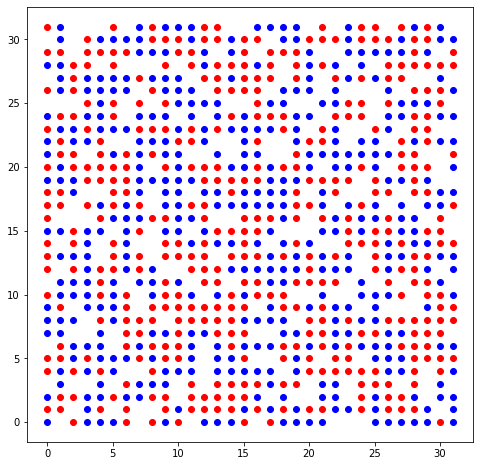

In [14]:
plot_gridworld(env.agents)

## The `Model` class and main loop

Let's get the model running by implementing our final class.  Remember `Model` contains a single method `run`that is the main loop of our simulation.  We will run the simulation to `MAX_ITER` unless we find all agents are satisified with their neighbours and then we will terminate early.

As we don't know how many iterations will make (other than a maximum) we will implement the main loop as a **while**.  A skeleton of the code looks like:

```python
converged = False
iteration = 0
while not converged and iteration < self.max_iter:
    converged = True
    iteration += 1
    
    # do work to simulate world ...
    
    # check for convergence ...
```

So what happens in each iteration?  Well the first thing we need to do is loop through each agent and check if it is happy or unhappy.  If the agent isn't satisified with their current neighbours we will make a note of it.  Once all agents have been checked we will randomly move the unhappy agents.  If anyone has moved then we know that we haven't converged yet and we will continue to loop. 

Breaking that up a bit the first thing we need to do is loop through the agents and check if they are unhappy.  We do the tracking in a local scope list called `to_move`.

```python
to_move = []
for agent in self.env.agents:
    if agent.is_unsatified_with_neighbours():
        # store a reference to the disatisified agent.
        to_move.append(agent)
```

if `to_move` is empty we know the simulation has not converged to a solution and we can terminate the loop.

```python
if len(to_move) > 0:
    converged = False
```

To relocate agents in the environment we simply call the environments `relocate` method and pass in the agent.

```python
# relocate the agents
for agent in to_move:
    self.env.relocate(agent)
```

That's pretty much it.  A full implementation is included below.  I've added a few extra bits and pieces here including some calls to `print()` to display the current state of the simulation every 20 iterations.

In [15]:
class Model:
    '''
    Data Scientist Python-R segregation model.
    '''
    def __init__(self, environment, max_iter=MAX_ITER):
        self.env = environment
        self.max_iter = max_iter

    def run(self):
        '''
        Run the segregation simulation model
        '''
        start = time.time()
        print('iterations: ')
        converged, iteration = False, 0
        while not converged and iteration < self.max_iter:
            converged = True
            iteration += 1
            # agents that are disatisified
            to_move = []
            for agent in self.env.agents:

                if agent.is_unsatified_with_neighbours():
                    # store a reference to the disatisified agent
                    to_move.append(agent)

            if len(to_move) > 0:
                converged = False

            # relocated the agents
            for agent in to_move:
                self.env.relocate(agent)

            # report every 20 iterations
            if iteration % 20 == 0:
                print(f'{iteration}: proportion population moved: '
                      + f'{len(to_move)/len(self.env.agents)}')

        print(f'\nSimulation completed after {iteration} iterations')
        duration = time.time() - start
        print(f'Runtime = {duration:.2f}')

## Running the full simulation

We now have full implementations of `DataScientist`, `GridWorld` and `Model`.  To run our object based simulation model let's create a function called `main()` that creates and run's a `Model`.  At the end of the run we will plot the position of all agents in the world.   

In [16]:
def main():
    '''
    Main routine. Creates a gridworld and runs a segregation model
    Plots reults in 2d matplotlib chart
    '''
    print('Running Data Scientist Segregation Model')
    env = GridWorld(n_rows=N_ROWS, n_cols=N_COLS,
                    n_empty=int(PERCENT_EMPTY * N_CELLS),
                    random_seed=42)
    
    model = Model(env)
    model.run()

    # plot the results
    plot_gridworld(model.env.agents)

Running Data Scientist Segregation Model
empty cells: 204, expected: 204
agents: 820
grid size: 1024
iterations: 

Simulation completed after 8 iterations
Runtime = 0.23


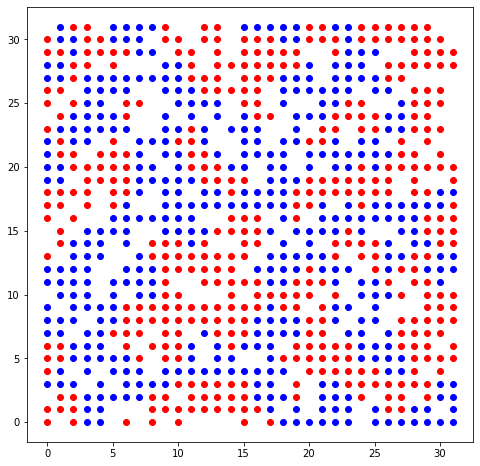

In [17]:
main()

Well done! You have your first full simulation model built using OOP.  What you should see is that we get segregated data scientist communities even with a fairly low similarity threshold of 30%.  Of course this is a big simplication of reality.  Data scientisits are not opinionated about coding at all!